# Oil In Saudi Arabia:
### A Study
In this notebook I do an exploratory data analysis on the oil dataset, which was taken from Saudi Central Bank (SAMA), and cleaned by me. Then I try to predict oil prices.


#### About The Dataset:
The dataset was taken from [SAMA's Open Data Portal, Energy Sector](https://www.sama.gov.sa/en-US/EconomicReports/Pages/database.aspx).

![img.png](https://argaamplus.s3.amazonaws.com/f6fa3d5e-1e95-4b3e-bd39-e00af03de512.png)

The dataset spans from 2005 to 2021.
There are 13 primary column groups:
1. Year
2. Saudi Crude Oil and Natural Gas Reserves
3. Saudi Crude Oil Production
4. Production of Refined Products
5. Saudi Aramco Production of Natural Gas Liquids
6. Spot Prices of Saudi Crude Oils
8. World Oil Production
9. Nominal and Real Oil Prices (Base Year 2005)
10. Average World Demand for Oil
11. Saudi Exports Of Refined Products By Destination
12. Saudi Exports of Crude Oil by Destination
13. Domestic Consumption of Refined Products, Crude Oil and Natural Gas


---


Some notes about the data:
1. Prices are in U.S.$ per barrel.
2. Real prices are calculated by using the OPEC Basket Deflator.
3. World oil production includes condensates and natural gas liquids.
4. Average world demand for oil includes primary stock, bunker and refining oil.
5. Saudi exports of refined products includes LPG and natural gasoline.



### Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

### EDA

#### Read and prepare the data

In [ ]:
# read the data
oil_data = pd.read_excel("/content/oil_dataset.xlsx")
# strip white spaces from the start and back
oil_data.columns = oil_data.columns.str.strip()
# replace - with nan
oil_data.replace("-", np.nan, inplace=True)

oil_data.head()

,Year,Saudi Aramco Crude Oil Reserves,Others Crude Oil Reserve,Total Crude Oil Reserves,Saudi Aramco Natural Gas Reserves,Others Natural Gas Reserves,Total Natural Gas Reserves,Total Crude Oil Production,Percentage Change Crude Oil Production,Daily Average Crude Oil Production,...,Natural Gas (Public Consumption),Naphtha (Public Consumption),Reformate (Public Consumption),Liquefied Petroleum Gas (Oil Industry Consumption),Fuel Oil (Oil Industry Consumption),Diesel (Oil Industry Consumption),Fuel Gas (Oil Industry Consumption),Crude Oil (Oil Industry Consumption),Natural Gas (Oil Industry Consumption),Others (Oil Industry Consumption)
0,2005,259.78,4.43,264.21,239475,4173.0,243648,3413.94,4.841077,9.353260,...,336.330,NaN,NaN,1.040,9.360,4.110,19.070,0.230,80.560,4.420
1,2006,259.92,4.33,264.25,248452,4155.0,252607,3360.90,-1.553630,9.207945,...,345.880,NaN,NaN,1.270,8.300,4.970,19.440,0.200,77.020,-0.780
2,2007,259.94,4.27,264.21,253789,4165.0,257954,3217.77,-4.258681,8.815808,...,349.045,NaN,NaN,2.449,7.996,2.454,18.293,0.330,90.915,4.432
3,2008,259.96,4.10,264.06,262969,4342.0,267311,3366.34,4.617173,9.197650,...,381.347,NaN,NaN,2.565,8.045,3.348,25.106,0.301,96.318,2.209
4,2009,260.07,4.52,264.59,275177,4493.0,279670,2987.27,-11.260598,8.184301,...,380.787,NaN,NaN,2.639,7.176,6.014,12.100,0.343,85.455,2.135


In [ ]:
# how many nan in each column
oil_data.isnull().sum()

Year                                      0
Saudi Aramco Crude Oil Reserves           0
Others Crude Oil Reserve                  1
Total Crude Oil Reserves                  0
Saudi Aramco Natural Gas Reserves         0
                                         ..
Diesel (Oil Industry Consumption)         0
Fuel Gas (Oil Industry Consumption)       0
Crude Oil (Oil Industry Consumption)      0
Natural Gas (Oil Industry Consumption)    1
Others (Oil Industry Consumption)         0
Length: 90, dtype: int64

In [ ]:
# total number of nan values
oil_data.isnull().sum().sum()

61

In [ ]:
print(f"rows={len(oil_data.index)}\ncols={len(oil_data.columns)}")

rows=17
cols=90


In [ ]:
oil_data.size

1530

In [ ]:
oil_data.dtypes

Year                                        int64
Saudi Aramco Crude Oil Reserves           float64
Others Crude Oil Reserve                  float64
Total Crude Oil Reserves                  float64
Saudi Aramco Natural Gas Reserves           int64
                                           ...   
Diesel (Oil Industry Consumption)         float64
Fuel Gas (Oil Industry Consumption)       float64
Crude Oil (Oil Industry Consumption)      float64
Natural Gas (Oil Industry Consumption)    float64
Others (Oil Industry Consumption)         float64
Length: 90, dtype: object

In [ ]:
oil_data.describe()

,Year,Saudi Aramco Crude Oil Reserves,Others Crude Oil Reserve,Total Crude Oil Reserves,Saudi Aramco Natural Gas Reserves,Others Natural Gas Reserves,Total Natural Gas Reserves,Total Crude Oil Production,Percentage Change Crude Oil Production,Daily Average Crude Oil Production,...,Natural Gas (Public Consumption),Naphtha (Public Consumption),Reformate (Public Consumption),Liquefied Petroleum Gas (Oil Industry Consumption),Fuel Oil (Oil Industry Consumption),Diesel (Oil Industry Consumption),Fuel Gas (Oil Industry Consumption),Crude Oil (Oil Industry Consumption),Natural Gas (Oil Industry Consumption),Others (Oil Industry Consumption)
count,17.000000,17.000000,16.000000,17.000000,17.000000,16.000000,17.000000,17.000000,17.000000,17.000000,...,16.000000,6.000000,5.000000,17.000000,17.000000,17.000000,17.000000,17.000000,16.000000,17.000000
mean,2013.000000,260.906353,5.084750,265.692000,287635.294118,5160.187500,292491.941176,3446.645294,0.292249,9.436637,...,470.261813,3.982667,6.191600,2.766647,8.754353,6.233647,24.194647,0.118235,106.200625,4.225529
std,5.049752,1.720136,0.603622,1.164008,26003.244263,715.138049,26139.682194,240.213277,5.849765,0.655503,...,94.312458,4.783031,4.377353,1.302934,5.155795,2.589363,6.714660,0.119764,16.317179,3.222338
min,2005.000000,259.690000,4.100000,264.060000,239475.000000,4155.000000,243648.000000,2980.430000,-11.260598,8.165562,...,336.330000,0.300000,0.000000,0.280000,4.269000,2.454000,12.100000,0.000000,77.020000,-0.780000
25%,2009.000000,259.960000,4.430000,264.515000,275177.000000,4455.250000,279670.000000,3360.900000,-4.258681,9.197650,...,381.207000,0.793750,4.144000,2.449000,6.101000,4.673000,19.440000,0.014000,94.967250,2.135000
50%,2013.000000,260.200000,5.398000,265.853000,287896.000000,5607.500000,293685.000000,3413.940000,-0.228972,9.353260,...,490.528000,1.368000,6.177000,2.639000,7.176000,6.014000,20.557000,0.090000,110.957000,3.681000
75%,2017.000000,261.110000,5.542000,266.580000,302310.000000,5759.500000,307936.000000,3579.960000,4.617173,9.808110,...,561.522750,7.145000,10.155000,3.725000,8.374000,7.683000,29.627000,0.200000,117.765500,5.596000
max,2021.000000,267.073000,5.720000,267.192000,324914.000000,5966.000000,329081.000000,3828.430000,14.027842,10.460191,...,604.883000,11.187000,10.482000,4.581000,24.990000,13.722000,34.399000,0.343000,128.515000,10.809000


In [ ]:
# reserves are in billions while productions are in millions
oil_data["Total Crude Oil Reserves"] = oil_data["Total Crude Oil Reserves"]*1000

#### Visualization

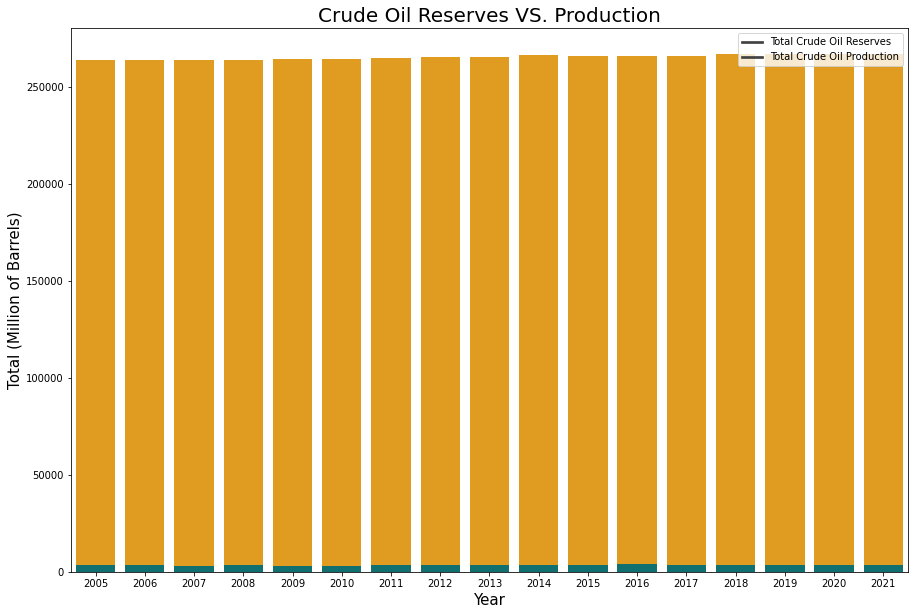

In [ ]:
# total crude oil reserves vs. production


plt.figure(figsize=(15, 10))

sns.barplot(data=oil_data, x="Year", y="Total Crude Oil Reserves",
             color="orange")
sns.barplot(data=oil_data, x="Year", y="Total Crude Oil Production",
             color="teal")

plt.ylabel("Total (Million of Barrels)", fontsize=15)
plt.xlabel("Year", fontsize=15)

plt.title("Crude Oil Reserves VS. Production", fontsize=20)
plt.legend(labels=["Total Crude Oil Reserves", "Total Crude Oil Production"]);

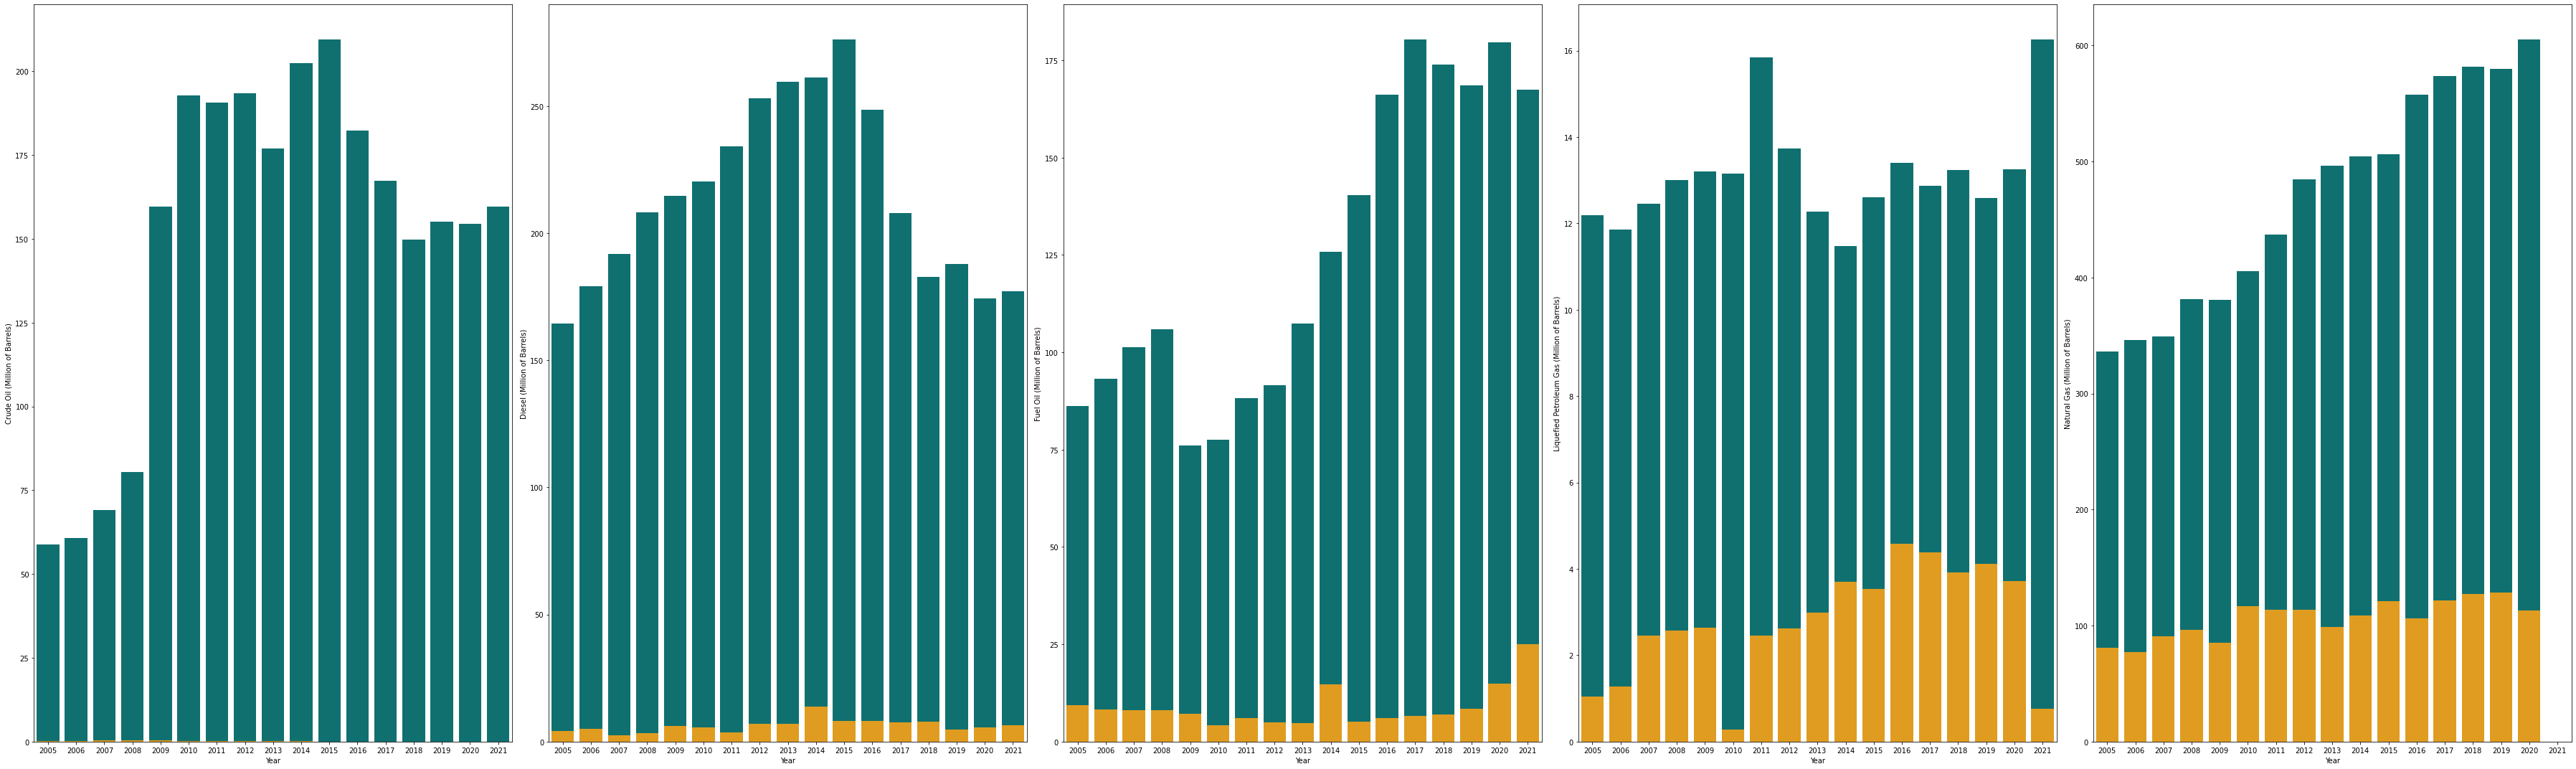

In [ ]:
# who consumes resources more, the public or the oil industry?


fig, axes = plt.subplots(1, 5, figsize=(50, 15))

pattern_public = "Y|[A-Z a-z]* \(P[A-Z a-z]*\)"
public = oil_data.filter(regex=pattern_public, axis=1)
public.columns = [re.sub(" \([A-Z a-z]*\)", 
                         "", x) for x in public.columns]

pattern_oil_indust = "Y|[A-Z a-z]* \(O[A-Z a-z]*\)"
oil_indust = oil_data.filter(regex=pattern_oil_indust, axis=1)
oil_indust.columns = [re.sub(" \([A-Z a-z]*\)", 
                             "", x) for x in oil_indust.columns]
                             

# shared: Liquefied Petroleum Gas, Fuel Oil, Diesel, Crude Oil, Natural Gas
# leave only the shared columns
shared = np.intersect1d(public.columns, oil_indust.columns)
public = public.filter(items=shared, axis=1)
oil_indust = oil_indust.filter(items=shared, axis=1)


for i in range(5):
    sns.barplot(data=public, x="Year", y=shared[i],
            color="teal",
            ax=axes[i])
    sns.barplot(data=oil_indust, x="Year", y=shared[i],
                color="orange",
                ax=axes[i]).set(ylabel=f"{shared[i]} (Million of Barrels)")

fig.tight_layout();

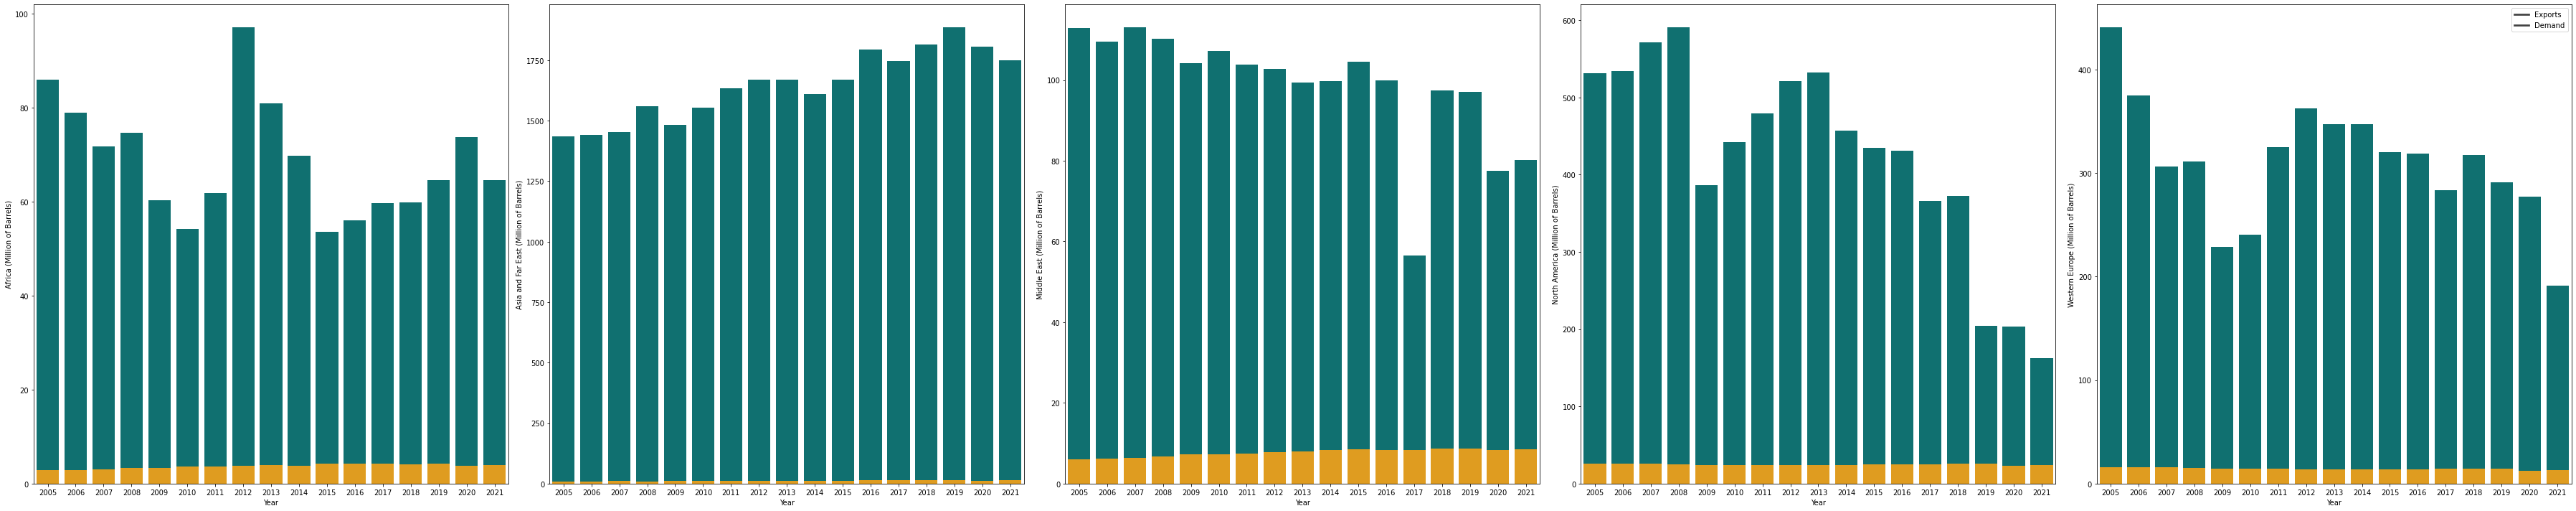

In [ ]:
# are we meeting the demand?


fig, axes = plt.subplots(1, 5, figsize=(50, 10))

pattern_1 = r"Year|[A-Z a-z ]*Cr[A-Z a-z ]*o "
countries_export = oil_data.filter(regex=pattern_1, axis=1)
countries_export.columns = [re.sub(pattern_1[5:],
                                   "", x) for x in countries_export.columns]

pattern_2 = r"Year|[A-Z a-z]* Demand[A-Z a-z]*"
countries_demand = oil_data.filter(regex=pattern_2, axis=1)
countries_demand.columns = [re.sub(" C\w*| Av[A-Z a-z ]*Oil\Z",
                                   "", x) for x in countries_demand.columns]
countries_demand = countries_demand.rename(columns={
    "Other Asian":"Asia and Far East",
    "Middle Eastern":"Middle East",
    "African":"Africa"})

# leave only the shared columns
shared = np.intersect1d(countries_demand.columns, countries_export.columns)
countries_export = countries_export.filter(items=shared, axis=1)
countries_demand = countries_demand.filter(items=shared, axis=1)

for i in range(5):
    sns.barplot(data=countries_export, x="Year", y=shared[i],
            color="teal",
            ax=axes[i])
    sns.barplot(data=countries_demand, x="Year", y=shared[i],
                color="orange",
                ax=axes[i]).set(ylabel=f"{shared[i]} (Million of Barrels)")

plt.legend(["Exports", "Demand"])
fig.tight_layout();

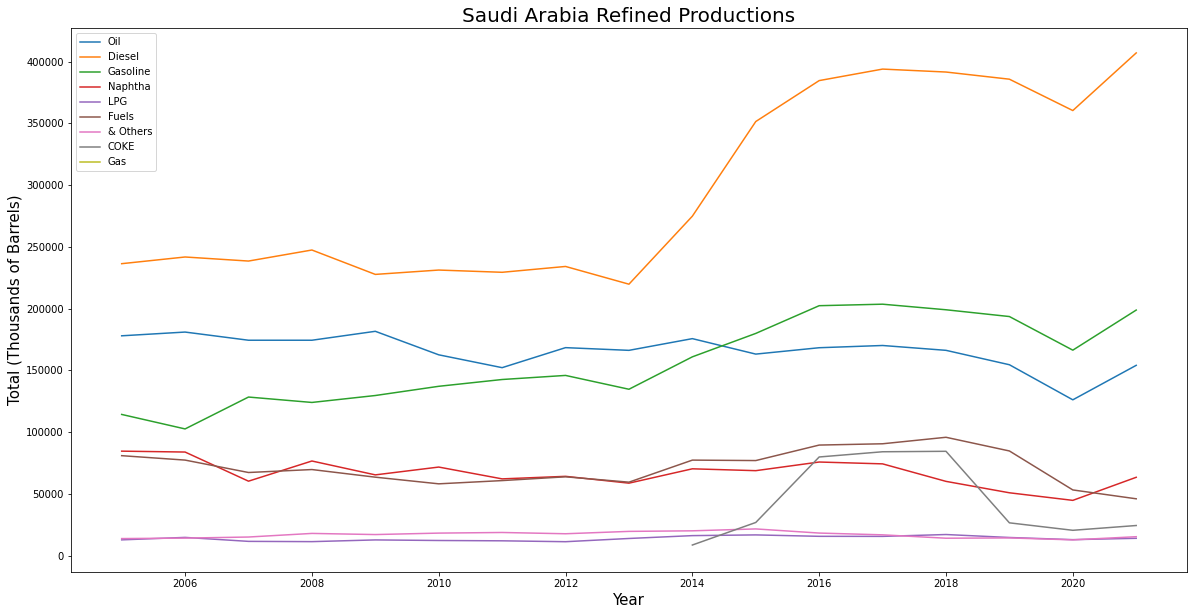

In [ ]:
# let's go in depth and see what refined products
# Saudi Arabia produced over the years


plt.figure(figsize=(20, 10))

pattern = r"^P[A-Z a-z ]*R[A-Z a-z ]* "
refined_prods = oil_data.filter(regex=pattern, axis=1)
labels = []

for y_ax in refined_prods.columns:
    sns.lineplot(data=oil_data, x="Year", y=y_ax)
    labels.append(re.sub(pattern, "", y_ax))

plt.ylabel("Total (Thousands of Barrels)", fontsize=15)
plt.xlabel("Year", fontsize=15)
plt.title("Saudi Arabia Refined Productions", fontsize=20)
plt.legend(labels);

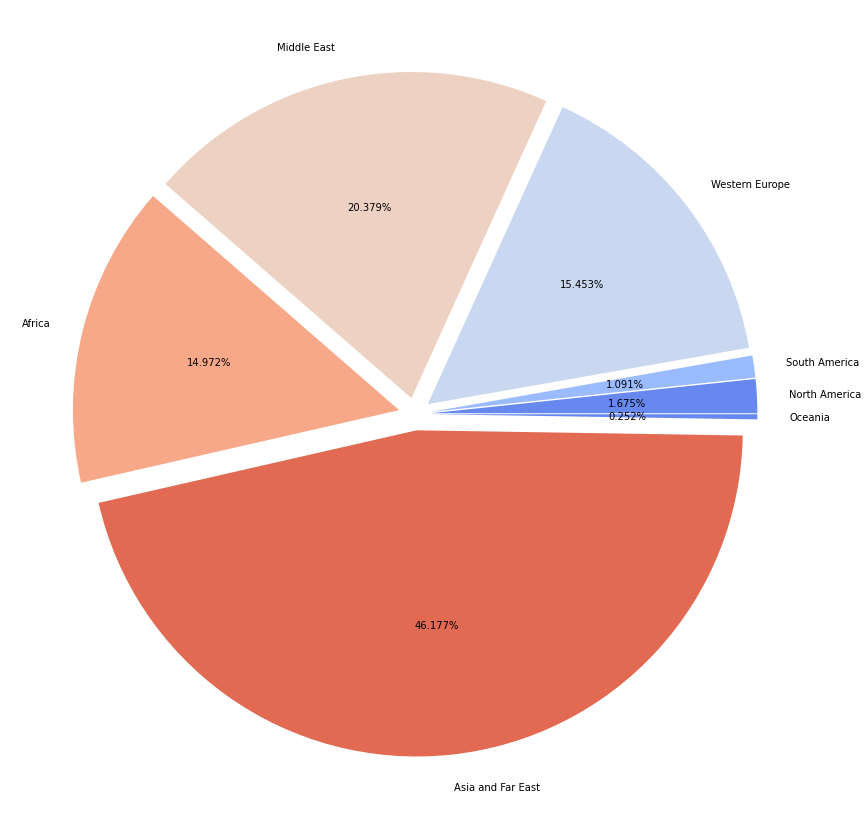

In [ ]:
# which country does Saudi Arabia exports refined products to the most?


plt.figure(figsize=(15, 15))

pattern = r"[A-Z a-z ]*R[A-Z a-z ]*o "

exports = oil_data.filter(regex=pattern, axis=1)
countries = [re.sub(pattern, "", x) for x in exports.columns]

plt.pie(x=exports.sum().values, explode=[0.05]*7, labels=countries, 
        colors=sns.color_palette("coolwarm"), autopct= '%0.3f%%');

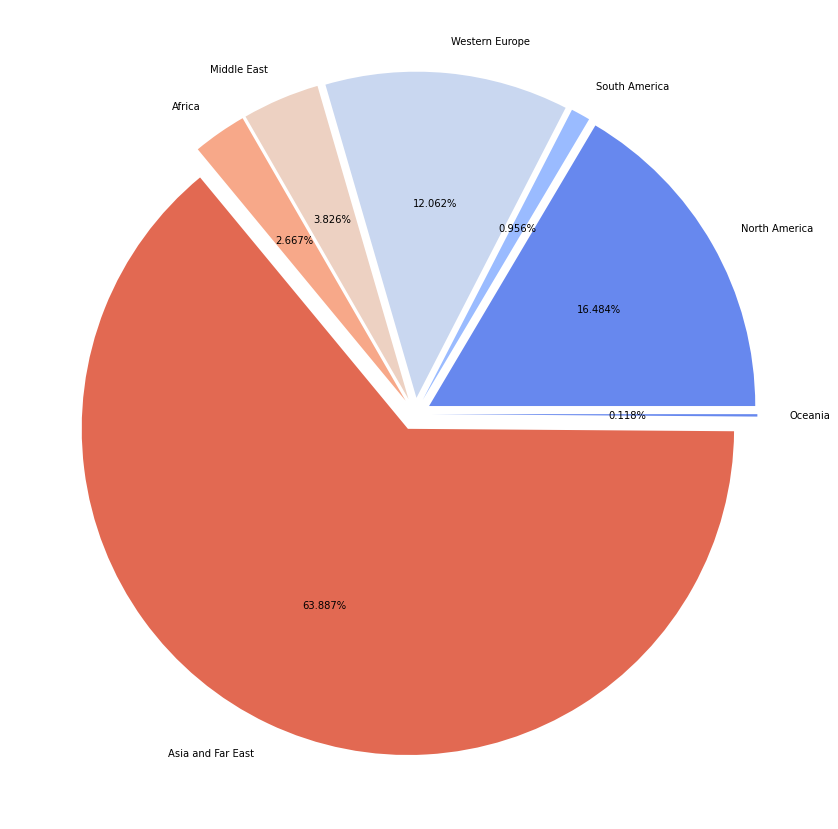

In [ ]:
# which country does Saudi Arabia exports crude oil to the most?


plt.figure(figsize=(15, 15))

pattern = r"[A-Z a-z ]*Cr[A-Z a-z ]*o "

exports = oil_data.filter(regex=pattern, axis=1)
countries = [re.sub(pattern, "", x) for x in exports.columns]

plt.pie(x=exports.sum().values, explode=[0.05]*7, labels=countries, 
        colors=sns.color_palette("coolwarm"), autopct= '%0.3f%%');

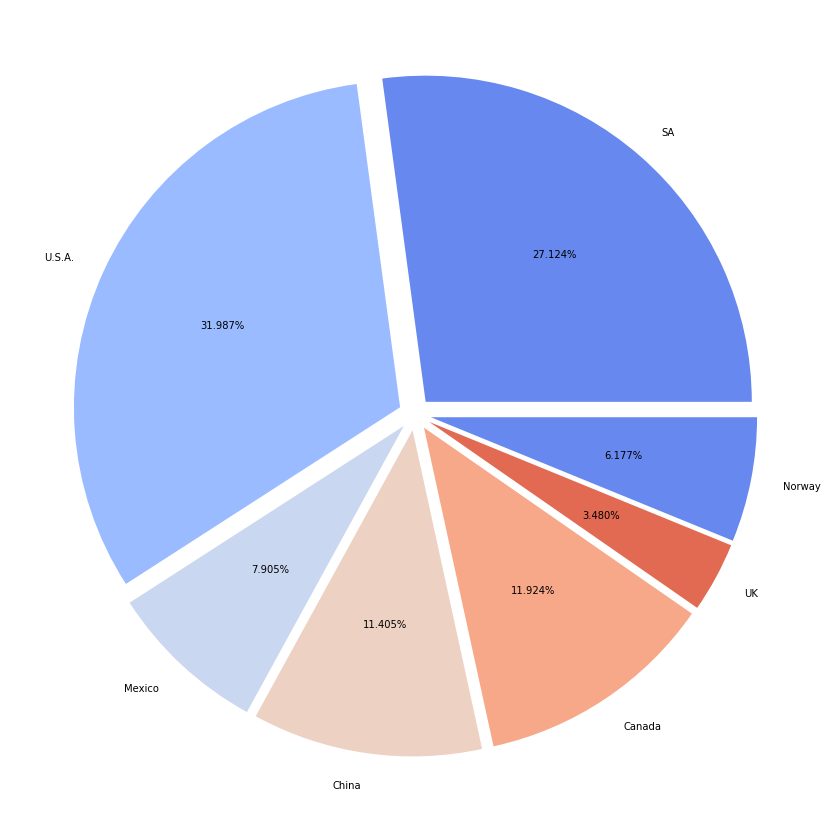

In [ ]:
# who is the largest producers in the world?
# note: here I choose to include only individual countries, I did not add
# OPEC, FSU, and OECD

plt.figure(figsize=(15, 15))

cols = ["Daily Average Crude Oil Production",
        "U.S.A. Oil Production", "Mexico Oil Production",
        "China Oil Production", "Canada Oil Production",
        "UK Oil Production", "Norway Oil Production"]

producers = oil_data.filter(items=cols, 
                            axis=1).rename(columns={
                                "Daily Average Crude Oil Production":"SA"
                                })

labels = [re.sub(" Oil Production", "", x) for x in producers.columns]

plt.pie(x=producers.sum().values, explode=[0.05]*7, labels=labels, 
        colors=sns.color_palette("coolwarm"), autopct= '%0.3f%%');

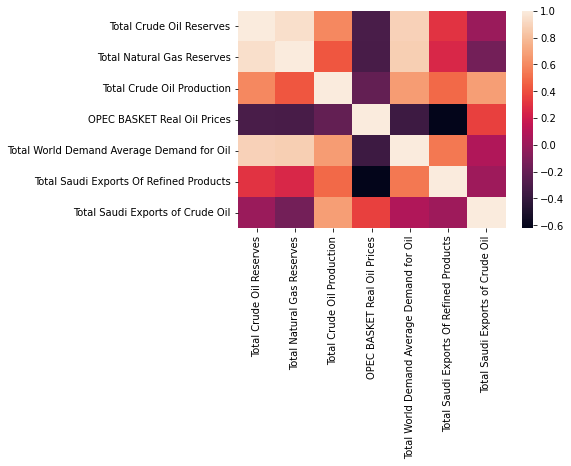

In [ ]:
# heatmap of some of the columns


cols = ["Total Crude Oil Reserves", 
        "Total Natural Gas Reserves", 
        "Total Crude Oil Production",
        "OPEC BASKET Real Oil Prices",
        "Total World Demand Average Demand for Oil",
        "Total Saudi Exports Of Refined Products",
        "Total Saudi Exports of Crude Oil"]

corr_data = oil_data.filter(items=cols, axis=1)
sns.heatmap(corr_data.corr());

#### Predicting Price

In [ ]:
# drop unimportant columns, keeping them may do more harm than good!
df = oil_data.drop(
    ['Saudi Aramco Crude Oil Reserves', 'Others Crude Oil Reserve',
       'Saudi Aramco Natural Gas Reserves',
       'Others Natural Gas Reserves', 'Total Natural Gas Reserves',
       'Production of Refined Fuel Oil',
       'Production of Refined Diesel', 'Production of Refined Gasoline',
       'Production of Refined Naphtha', 'Production of Refined LPG',
       'Production of Refined Kerosene Aviation Fuels',
       'Production of Refined Asphalt & Others', 'Production of Refined COKE',
       'Production of Refined Fuel Gas',
       'Annual Saudi Aramco Production',
       'Percentage Change Saudi Aramco Production',
       'Average Daily Saudi Aramco Production',
       'Total Non  - OPEC Oil Production',
       'Total World Oil Production', 'Arabian Light Nominal Oil Prices',
       'North Sea (Brent) Nominal Oil Prices',
       'OPEC BASKET Nominal Oil Prices',
       'Total Saudi Exports Of Refined Products',
       'Total Saudi Exports of Crude Oil',
       'Liquefied Petroleum Gas (Public Consumption)',
       'Jet Fuel and Kerosene (Public Consumption)', 
       'Asphalt (Public Consumption)',
       'Natural Gas (Public Consumption)', 'Naphtha (Public Consumption)',
       'Reformate (Public Consumption)',
       'Liquefied Petroleum Gas (Oil Industry Consumption)',
       'Natural Gas (Oil Industry Consumption)',
       'Others (Oil Industry Consumption)'], axis=1).dropna()

# the class is going to be OPEC Basket real prices
X, y = df.drop(['OPEC BASKET Real Oil Prices'], axis=1), df['OPEC BASKET Real Oil Prices']

# split the data to 75 training and 25 test
X_train, X_test, y_train, y_test = train_test_split(X, y)

##### 1. Linear Regression Model

In [ ]:
lr = LinearRegression().fit(X_train, y_train)  
  
# computing the accuracy score
y_hat = lr.predict(X_test)

print(f"MAE = {metrics.mean_absolute_error(y_test, y_hat)}", 
      f"MSE = {metrics.mean_squared_error(y_test, y_hat)}", 
      f"RMSE = {np.sqrt(metrics.mean_squared_error(y_test, y_hat))}",
      f"R^2 = {metrics.r2_score(y_test, y_hat)}", 
      sep="\n")

MAE = 8.381336423349921
MSE = 119.20959701208544
RMSE = 10.918314751466246
R^2 = -0.44057498739701617


##### 2. Lasso Regression Model

In [ ]:
lasso = Lasso(max_iter=10000, alpha=1.0, random_state=5).fit(X_train, y_train)  
  
# computing the accuracy score 
y_hat = lasso.predict(X_test)

print(f"MAE = {metrics.mean_absolute_error(y_test, y_hat)}", 
      f"MSE = {metrics.mean_squared_error(y_test, y_hat)}", 
      f"RMSE = {np.sqrt(metrics.mean_squared_error(y_test, y_hat))}",
      f"R^2 = {metrics.r2_score(y_test, y_hat)}", 
      sep="\n")

MAE = 11.335356947725955
MSE = 212.78155183671268
RMSE = 14.587033688749495
R^2 = -1.5713347669853643


##### 3. Gradient Boosting Regression Model

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=150, 
                                learning_rate=1.0,
                                max_depth=5, 
                                random_state=5).fit(X_train, y_train)  
  
# computing the accuracy score
y_hat = gbr.predict(X_test)

print(f"MAE = {metrics.mean_absolute_error(y_test, y_hat)}", 
      f"MSE = {metrics.mean_squared_error(y_test, y_hat)}", 
      f"RMSE = {np.sqrt(metrics.mean_squared_error(y_test, y_hat))}",
      f"R^2 = {metrics.r2_score(y_test, y_hat)}", 
      sep="\n")

MAE = 10.896666666666668
MSE = 139.44816666666668
RMSE = 11.80881732717831
R^2 = -0.6851457095187112
